# Visualización de datos con Python

### Ejemplos para el monográfico de la revista Epsilon sobre sofware para visualización de datos

##### José Miguel Contreras García y Cristina Hidalgo Castillo

### 1. Cargamos los datos

Para cargar los datos en memoria, en este caso en formato csv, a vamos a utilizar una biblioteca llamada pandas (que nombraremos como pd) y la función `read_csv`. LLamaremos a los datos `df`.

In [4]:
import pandas as pd

# Cargar archivo CSV
df = pd.read_csv('datospaper.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())


            ID  CODAUTO   Comunidad  CPRO    Provincia  SERIAL  TIP_H  TOT_MH  \
0  010000303 1       16  País Vasco     1  Araba/Álava       3      4       4   
1  010003003 1       16  País Vasco     1  Araba/Álava      30      4       3   
2  010010003 1       16  País Vasco     1  Araba/Álava     100      4       4   
3  010010003 2       16  País Vasco     1  Araba/Álava     100      4       4   
4  010010203 1       16  País Vasco     1  Araba/Álava     102      4       4   

   TOT10_15  ORD  ...  TELEF1  TELEF2  VIV_INTER  INTEFOR NPER  SEXO  EDAD  \
0         1    6  ...       6       1          1        1    3     6    12   
1         1    1  ...       6       1          1        1    3     6    15   
2         2    1  ...       1       1          1        1    3     6    15   
3         2    1  ...       1       1          1        1    4     6    12   
4         1    1  ...       1       1          1        1    3     1    11   

   PC  INT  MOVIL  
0   1    6      6  
1   

La descripción de las variables del DataFrame, conjunto de datos llamado `df`, son: 

- **ID**: Identificador único de cada registro.
- **CODAUTO**: Código de la comunidad autónoma.
- **Comunidad**: Nombre de la comunidad autónoma.
- **CPRO**: Código de la provincia.
- **Provincia**: Nombre de la provincia.
- **SERIAL**: Número de serie único del registro.
- **TIP_H**: Tipo de hogar.
- **TOT_MH**: Total de miembros en el hogar.
- **TOT10_15**: Total de miembros en el hogar entre 10 y 15 años.
- **ORD**: Número de orden de la persona en el hogar.
- **TABLET**: Indicador de si hay una tablet en el hogar (1 = Sí, 0 = No).
- **TELEF1**: Indicador de si hay un teléfono en el hogar (1 = Sí, 0 = No).
- **TELEF2**: Indicador de si hay un segundo teléfono en el hogar (1 = Sí, 0 = No).
- **VIV_INTER**: Indicador de si la vivienda tiene acceso a internet (1 = Sí, 0 = No).
- **INTEFOR**: Indicador de si se ha recibido formación en el uso de internet (1 = Sí, 0 = No).
- **NPER**: Número de personas en el hogar.
- **SEXO**: Sexo de la persona (1 = Hombre, 2 = Mujer).
- **EDAD**: Edad de la persona.
- **PC**: Indicador de si hay una computadora en el hogar (1 = Sí, 0 = No).
- **INT**: Indicador de si la persona usa internet (1 = Sí, 0 = No).
- **MOVIL**: Indicador de si la persona tiene teléfono móvil (1 = Sí, 0 = No).



Basado en estos datos, vamos a crear gráficos que proporcionen información útil. 

### 1.1 Gráfico de Barras

Este gráfico es ideal para representar variables cualitativas o cuantitativas discretas. En este caso vamos a hacer uso de  matplotlib y seaborn, dos bibliotecas populares de Python para visualización de datos. Un ejemplo que podemos realizar es mostrar el total de individuos con acceso a internet en cada comunidad autónoma:

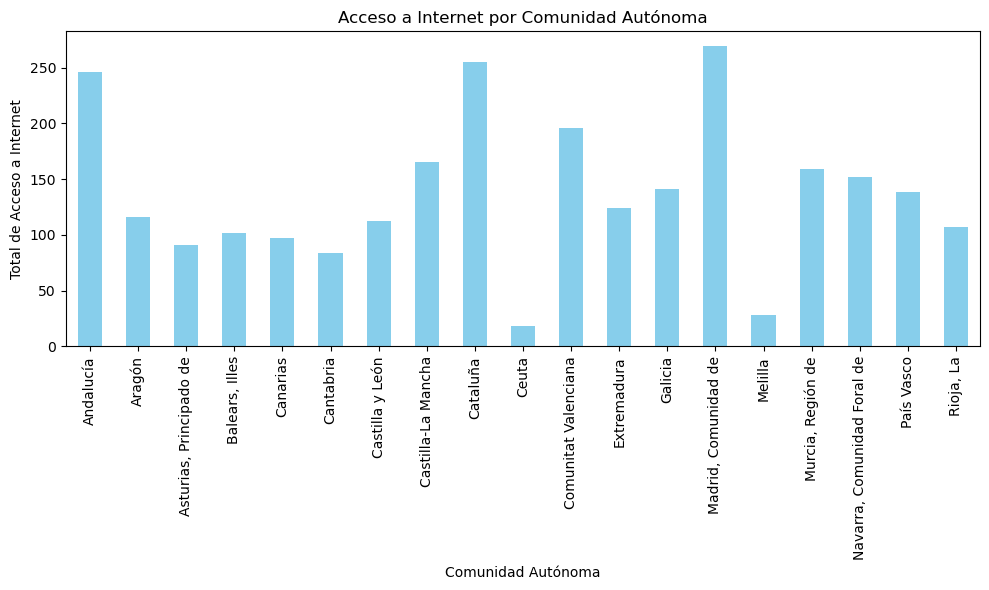

In [7]:
import matplotlib.pyplot as plt

# Agrupar por comunidad y sumar el acceso a internet
df_grouped = df.groupby('Comunidad')['VIV_INTER'].sum()

# Crear un diagrama de barras
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', color='skyblue') 
plt.title('Acceso a Internet por Comunidad Autónoma')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Total de Acceso a Internet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Vamos a describir el código anterior paso a paso:


- `df.groupby('Comunidad')`: Agrupa las filas que tienen el mismo valor en la columna `Comunidad`.
- `['VIV_INTER']`: Selecciona la columna que contiene el acceso a internet.
- `.sum()`: Suma los valores de cada grupo (comunidad) para obtener el total de viviendas con acceso a internet.


- `plt.figure(figsize=(10, 6))`: Crea una nueva figura con un tamaño de 10x6 pulgadas. Esto define el tamaño del gráfico.
- `df_grouped.plot(kind='bar', color='skyblue')`: Genera el gráfico de barras usando los datos agrupados.
  - `kind='bar'` especifica que queremos un gráfico de barras.
  - `kind='barh'` si queremos el mismo gráfico pero en vertical. 
  - `color='skyblue'` da un color azul claro a las barras.
  

- `plt.title('Acceso a Internet por Comunidad Autónoma')`: Añade un título al gráfico.
- `plt.xlabel('Comunidad Autónoma')`: Etiqueta el eje X con "Comunidad Autónoma".
- `plt.ylabel('Total de Acceso a Internet')`: Etiqueta el eje Y con "Total de Acceso a Internet".
- `plt.xticks(rotation=90)`: Gira los nombres de las comunidades en el eje X para que sean legibles.


- `plt.tight_layout()`: Ajusta el diseño del gráfico para que las etiquetas y los ejes no se superpongan.
- `plt.show()`: Muestra el gráfico en pantalla.

Vamos a ver como si lo has comprendido. ¿Cómo cambiarías la inclinación de las etiquetas relacionadas con el 'Total de Acceso a Internet', para que se muestren verticales?

- a) `plt.xticks(rotation=0)`
- b) `plt.xticks(rotation=180)`
- c) `plt.yticks(rotation=90)`
- d) `plt.yticks(rotation=270)`
- e) `Es imposible`

Otra forma de realizar el gráfico es mediante la función `sns.barplot` de la biblioteca `Seaborn`. Seaborn está basado en matplotlib y proporciona una interfaz simple y estilizada para crear gráficos.

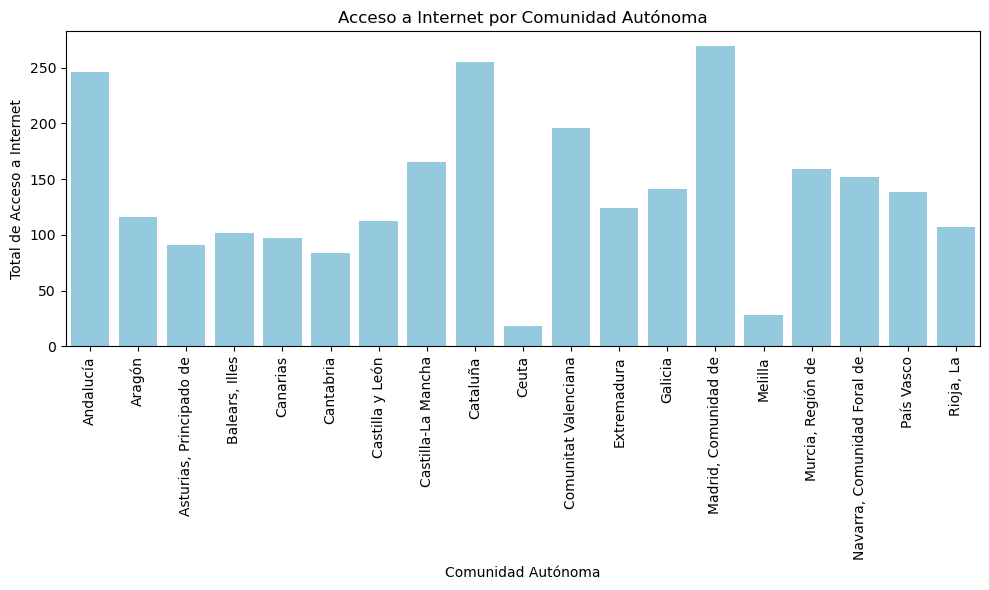

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por comunidad y sumar el acceso a internet
df_grouped = df.groupby('Comunidad')['VIV_INTER'].sum().reset_index()

# Crear un diagrama de barras
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(x='Comunidad', y='VIV_INTER', data=df_grouped, color='skyblue')

plt.title('Acceso a Internet por Comunidad Autónoma')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Total de Acceso a Internet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

La diferencia principal es que ahora usamos `reset_index()` para convertir los datos agrupados en un DataFrame de pandas, lo cual es necesario para que Seaborn los procese correctamente.

Para crear el gráfico de barras utilizamos la función `sns.barplot()` con los siguientes parámetros:

- `sns.barplot()`: Es la función que genera el gráfico de barras en Seaborn.
  - `x='VIV_INTER'`: Especifica qué columna va en el eje X (en este caso, el total de viviendas con acceso a internet).
  - `y='Comunidad'`: Especifica qué columna va en el eje Y (en este caso, las comunidades autónomas).
  - `data=df_grouped`: Es el DataFrame que contiene los datos que vamos a graficar.
  - `color='skyblue'`: Establece el color de las barras.

En este caso, para cambiar la horientación vasta con intercambiar las variables `x` e `y` `sns.barplot(x='VIV_INTER', y='Comunidad', data=df_grouped, color='skyblue')`

Éste tipo de gráficos es ideal para comparar, por ejemplo, categorías como el número de personas con acceso a PC, Internet o Móvil por provincia o comunidad. Por ejemplo: "Acceso a Internet por Comunidad Autónoma".Vamos a crear un gráfico de barras "atractivo" que compare el acceso a Internet (representado por la columna INT) por comunidad autónoma. 

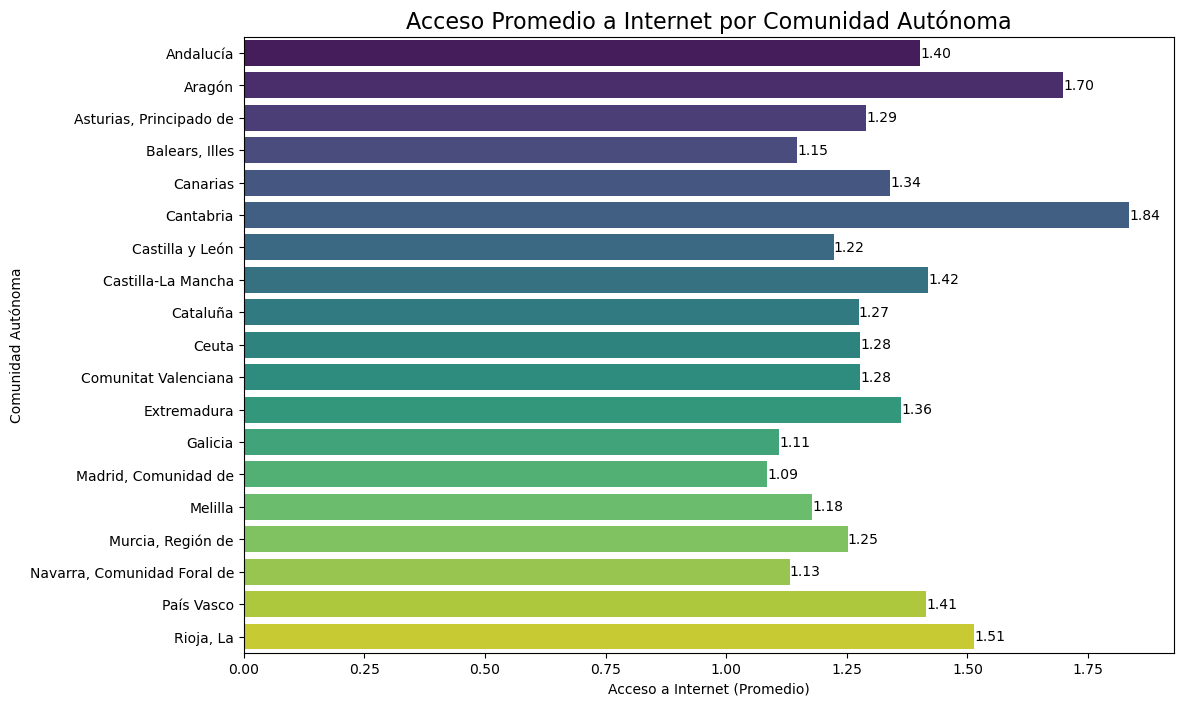

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos: Agrupar por Comunidad Autónoma y calcular el promedio de acceso a Internet
data_grouped = df.groupby('Comunidad')['INT'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
sns.barplot(x='INT', y='Comunidad', hue='Comunidad', data=data_grouped, palette='viridis', dodge=False, legend=False)

# Añadir título y etiquetas
plt.title('Acceso Promedio a Internet por Comunidad Autónoma', fontsize=16)
plt.xlabel('Acceso a Internet (Promedio)')
plt.ylabel('Comunidad Autónoma')

# Añadir etiquetas a las barras
for index, value in enumerate(data_grouped['INT']):
    plt.text(value, index, f'{value:.2f}', color='black', va="center")

# Mostrar el gráfico
plt.show()

### Explicación del Código:

1. **Importar Bibliotecas Necesarias**: 
   - `matplotlib` y `seaborn` para la visualización.

2. **Preparar los Datos**:
   - Agrupamos los datos por la columna `Comunidad` y calculamos el promedio de acceso a Internet (`INT`).
   - Configuramos el tamaño del gráfico.

3. **Crear el Gráfico de Barras**:
   - Utilizamos `sns.barplot()` de `seaborn` para crear un gráfico de barras.
   - `palette='viridis'` es una paleta de colores atractiva que mejora la apariencia del gráfico.

4. **Personalización del Gráfico**:
   - Añadimos un título y etiquetas a los ejes.
   - Utilizamos un bucle `for` para añadir etiquetas de texto con los valores exactos de cada barra.
   

---
---

### Tarea 1:

1. **Cambiar la Variable del Eje Y**: 
   - En lugar de visualizar el acceso promedio a Internet (`INT`), cambia la variable del eje Y para mostrar otra variable, como el acceso a PC (`PC`) o a móvil (`MOVIL`). 
   - Asegúrate de cambiar el título del gráfico y la etiqueta del eje X para que coincidan.

2. **Modificar la Paleta de Colores**: 
   - Cambia la paleta de colores de `viridis` a otra paleta disponible en Seaborn, como `coolwarm`, `magma`, o `pastel`. 
   - Observa cómo los diferentes colores afectan la percepción del gráfico.

3. **Invertir los Ejes X e Y**: 
   - Cambia el gráfico de barras para que sea horizontal, colocando las comunidades autónomas en el eje X y la variable seleccionada en el eje Y. 
   - Ajusta las etiquetas de los ejes en consecuencia.

4. **Añadir una Línea de Referencia**: 
   - Añade una línea de referencia horizontal o vertical (dependiendo de la orientación del gráfico) para indicar un valor promedio de referencia, usando `plt.axhline()` o `plt.axvline()`. Busca en internet como hacerlo.

5. **Cambiar el Tamaño del Gráfico**: 
   - Experimenta con diferentes tamaños de gráficos usando `plt.figure(figsize=(width, height))` para ver cómo cambia la presentación.


**Preguntas para Reflexión:**
   - ¿Cómo afecta la elección de la paleta de colores a la interpretación del gráfico?
   - ¿Qué cambia en la percepción del gráfico cuando se invierten los ejes?
   - ¿Por qué es útil agregar una línea de referencia? ¿Cómo se puede usar en la interpretación de datos?
---
---

### Solución Tarea 1:

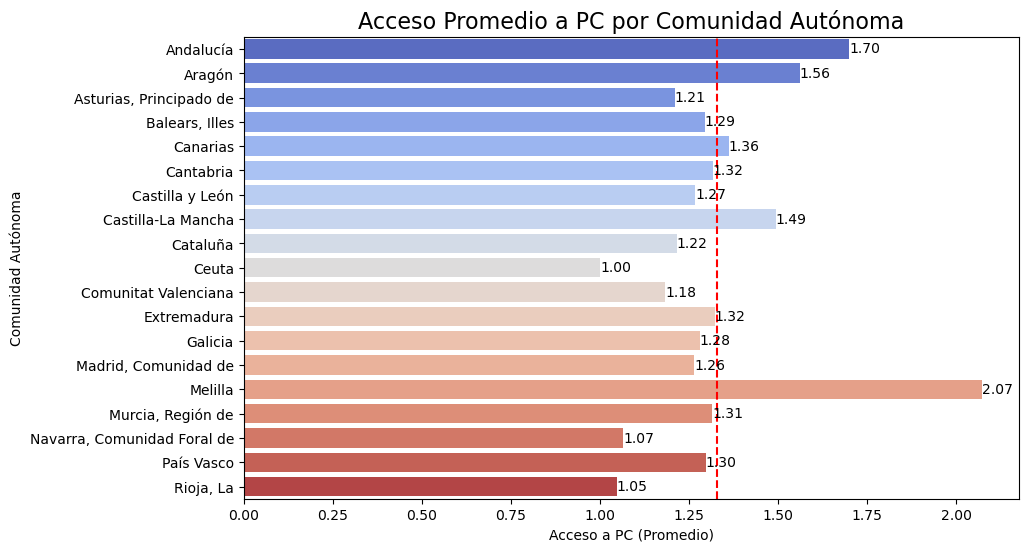

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos: Agrupar por Comunidad Autónoma y calcular el promedio de una variable seleccionada
data_grouped = df.groupby('Comunidad')['PC'].mean().reset_index()  # Cambiar 'PC' por 'MOVIL' u otra variable

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))  # Cambiar tamaño si es necesario

# Crear el gráfico de barras (horizontal en este caso)
sns.barplot(x='PC', y='Comunidad', hue='Comunidad', data=data_grouped, palette='coolwarm', dodge=False, legend=False)
  # Cambiar 'coolwarm' por otra paleta

# Añadir título y etiquetas
plt.title('Acceso Promedio a PC por Comunidad Autónoma', fontsize=16)  # Ajustar el título según la variable seleccionada
plt.xlabel('Acceso a PC (Promedio)')
plt.ylabel('Comunidad Autónoma')

# Añadir una línea de referencia
plt.axvline(x=data_grouped['PC'].mean(), color='red', linestyle='--')  # Línea de referencia en el promedio

# Añadir etiquetas a las barras
for index, value in enumerate(data_grouped['PC']):
    plt.text(value, index, f'{value:.2f}', color='black', va="center")

# Mostrar el gráfico
plt.show()

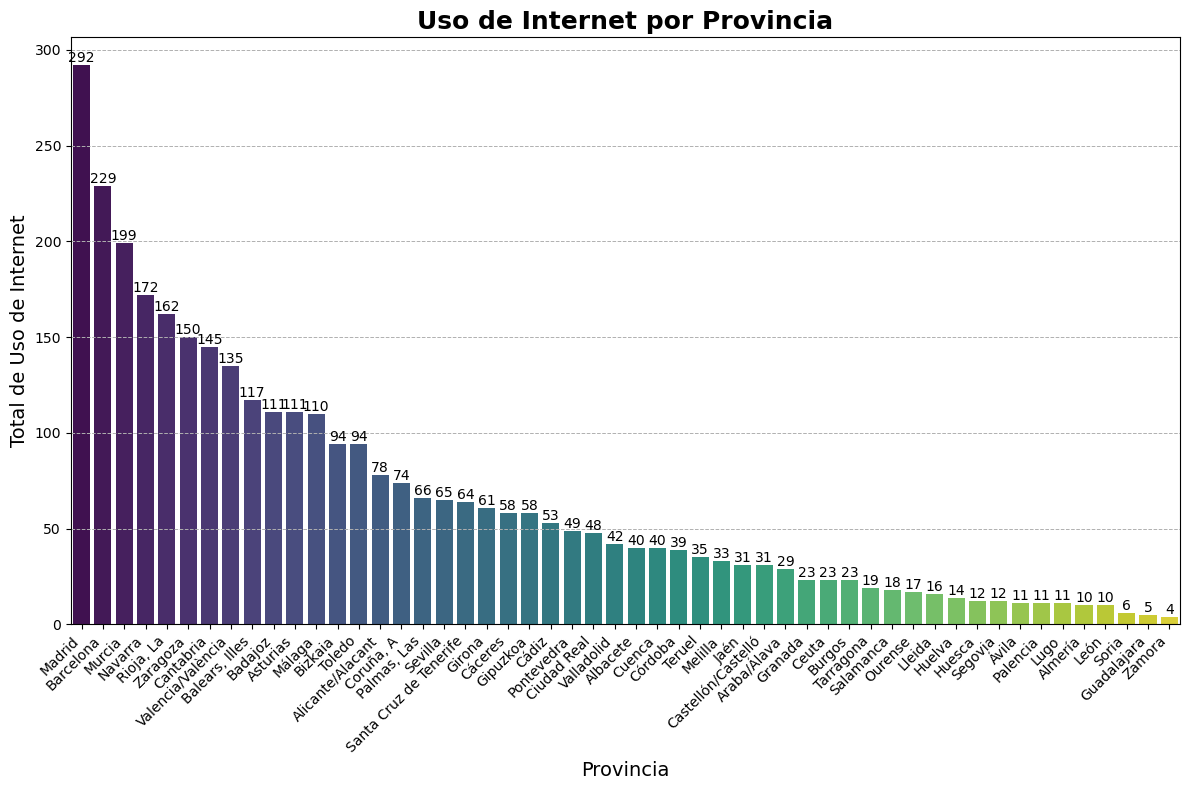

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por provincia y calcular el total de uso de internet
df_grouped = df.groupby('Provincia')['INT'].sum().reset_index()

# Ordenar los datos por uso de internet para mejorar la presentación
df_grouped = df_grouped.sort_values(by='INT', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='INT', hue='Provincia', data=df_grouped, palette='viridis', dodge=False, legend=False)

# Añadir título y etiquetas
plt.title('Uso de Internet por Provincia', fontsize=18, fontweight='bold')
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Total de Uso de Internet', fontsize=14)

# Rotar las etiquetas de la provincia para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir las etiquetas de valor en cada barra
for index, value in enumerate(df_grouped['INT']):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

# Añadir cuadrícula para mejorar la legibilidad
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Ajustar los márgenes para que las etiquetas no se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### 1.2. Gráfico de líneas. 

Éste gráfico es util para mostrar tendencias a lo largo del tiempo o de un rango continuo. Es ideal para mostrar:

- Evolución temporal: Cambios de una variable a través del tiempo (por ejemplo, ventas mensuales, temperatura diaria, etc.).
- Tendencias: Patrón o dirección de los datos a lo largo de un periodo.
- Comparación: Comparar varias series de datos simultáneamente.

Por ejemplo, nos puede servir para mostrar la "Tendencia del uso de Internet entre diferentes grupos de edad".


Vamos a crear un gráfico de líneas que muestre la tendencia del uso de dispositivos móviles (MOVIL) entre diferentes grupos de edad (EDAD). Utilizaremos la biblioteca matplotlib y en especial la fución `plt.plot`. Para ello, lo primero es agrupar los datos por edad y calcular el promedio de acceso a internet para cada grupo de edad.



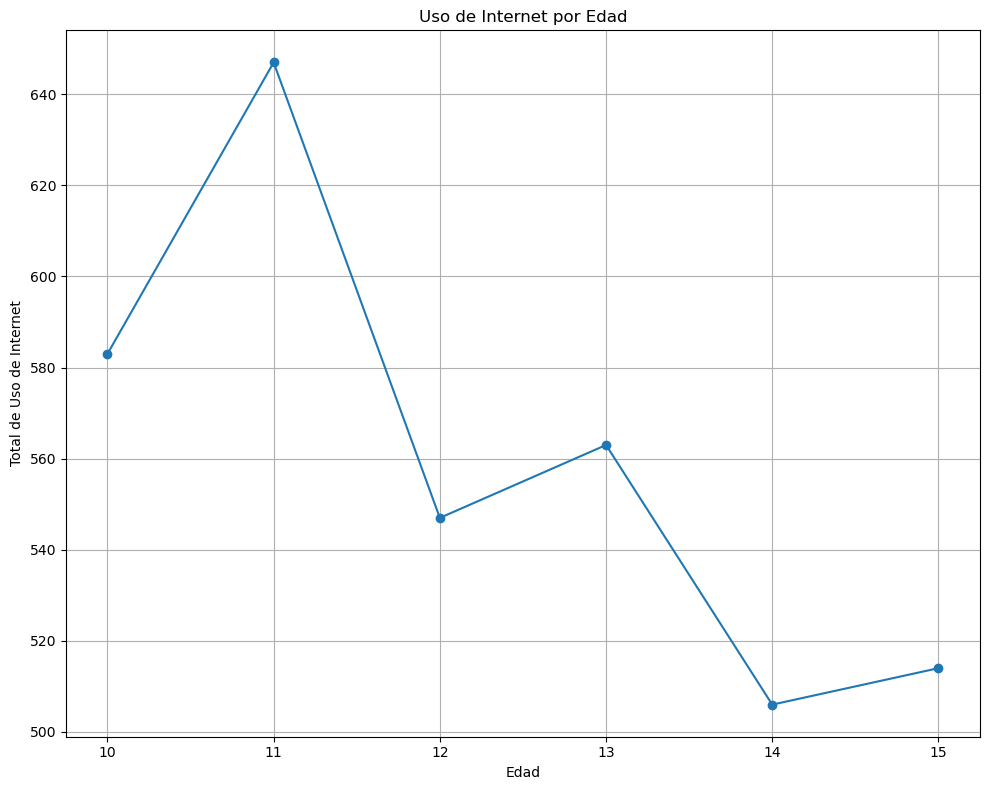

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por edad y sumar el uso de internet
df_grouped = df.groupby('EDAD')['INT'].sum().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el gráfico de líneas
plt.plot(df_grouped['EDAD'], df_grouped['INT'], marker='o')

# Añadir título y etiquetas
plt.title('Uso de Internet por Edad')
plt.xlabel('Edad')
plt.ylabel('Total de Uso de Internet')

# Añadir cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

O para mostrar la "Tendencia del uso de dispositivos móviles entre diferentes grupos de edad".


En este caso vamos a crear un gráfico de líneas que muestre la tendencia del uso de dispositivos móviles (MOVIL) entre diferentes grupos de edad (EDAD). Utilizaremos matplotlib y seaborn para hacer el gráfico atractivo y fácil de entender utilizando en este caso la función `sns.lineplot`. Para ello, lo primero es agrupar los datos por edad y calcular el promedio de acceso a móviles para cada grupo de edad.


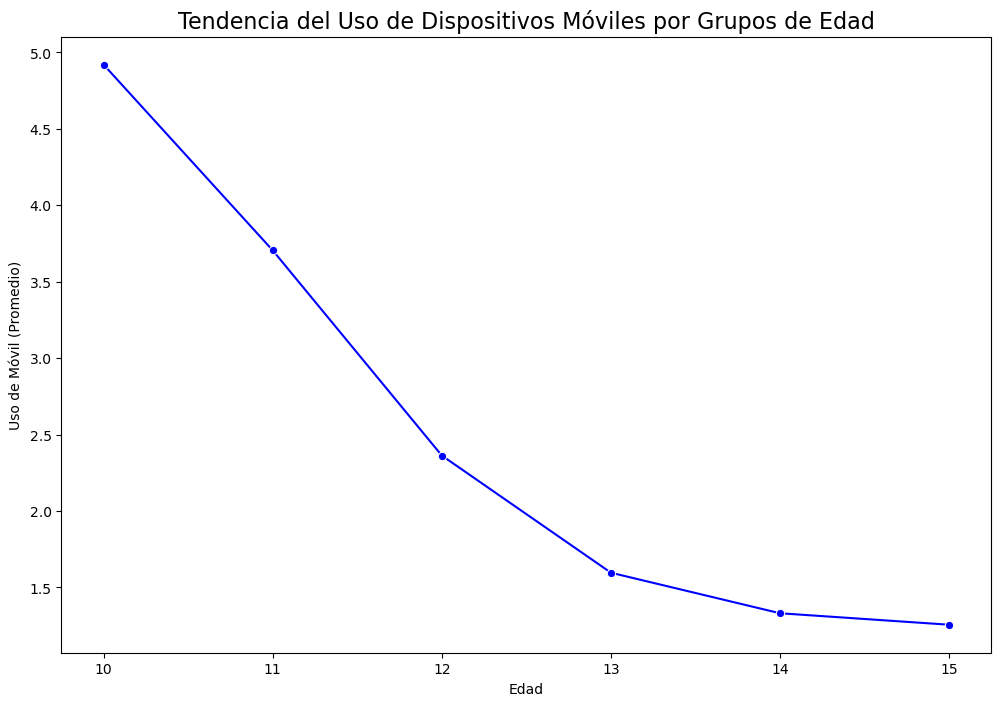

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos: Agrupar por edad y calcular el promedio de uso de móvil
data_grouped_age = df.groupby('EDAD')['MOVIL'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de líneas
sns.lineplot(x='EDAD', y='MOVIL', data=data_grouped_age, marker='o', linestyle='-', color='b')

# Añadir título y etiquetas
plt.title('Tendencia del Uso de Dispositivos Móviles por Grupos de Edad', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Uso de Móvil (Promedio)')

# Mostrar el gráfico
plt.show()

### Explicación del Código:

1. **Importar Bibliotecas Necesarias**:
   - `matplotlib` y `seaborn` para la visualización.

2. **Cargar y Preparar los Datos**:
   - Leemos los datos desde un archivo CSV utilizando `pd.read_csv()`.
   - Agrupamos los datos por la columna `EDAD` y calculamos el promedio de uso de móviles (`MOVIL`).

3. **Crear el Gráfico de Líneas**:
   - Utilizamos `sns.lineplot()` de `seaborn` para crear un gráfico de líneas.
   - `marker='o'` añade marcadores de puntos a la línea para cada grupo de edad.
   - `color='b'` establece el color de la línea en azul.

4. **Personalización del Gráfico**:
   - Añadimos un título y etiquetas a los ejes para mejorar la claridad del gráfico.

---
---

### Tarea 2:

1. **Añadir una Segunda Línea de Datos**: 
   - Añade una segunda línea de datos al gráfico para comparar el uso de Internet (`INT`) con el uso de móviles (`MOVIL`) en el mismo gráfico. 
   - Utiliza diferentes estilos de líneas o colores para distinguir ambas líneas.

**Preguntas para Reflexión:**
   - ¿Cómo afecta la presentación de los datos la elección del estilo del gráfico?
   - ¿Por qué es importante añadir una segunda línea de datos para comparar variables relacionadas?
---
---

### Solución Tarea 2:

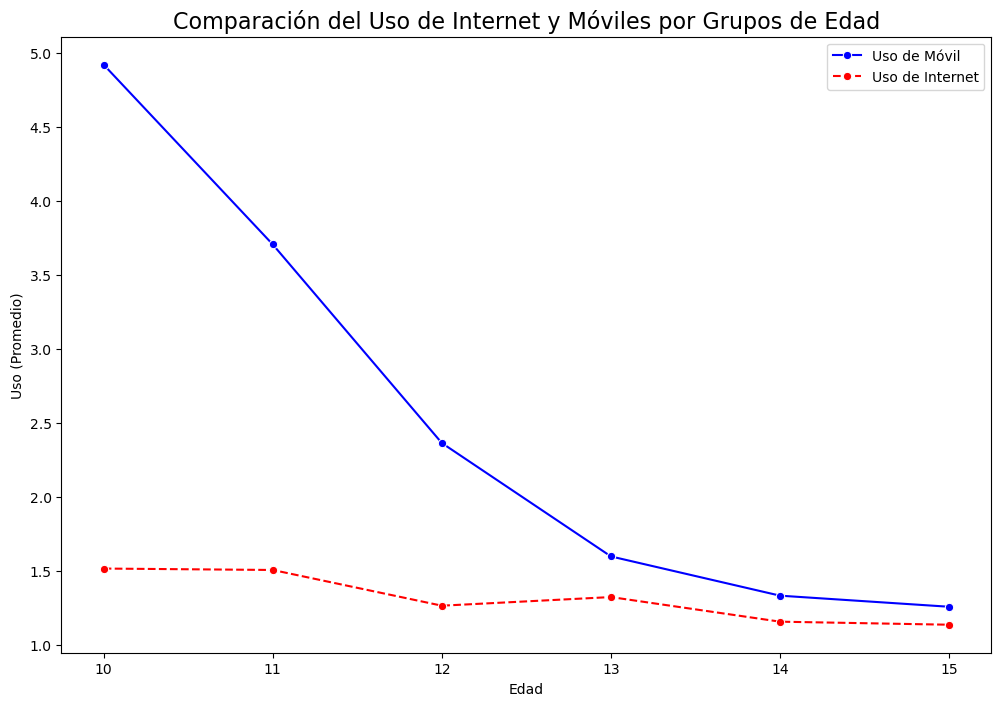

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Añadir una Segunda Línea de Datos ###

# Agrupar los datos por edad y calcular el promedio de uso de móvil y acceso a Internet
data_grouped_age = df.groupby('EDAD')[['MOVIL', 'INT']].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de líneas para MOVIL
sns.lineplot(x='EDAD', y='MOVIL', data=data_grouped_age, marker='o', linestyle='-', color='b', label='Uso de Móvil')

# Crear el gráfico de líneas para INT
sns.lineplot(x='EDAD', y='INT', data=data_grouped_age, marker='o', linestyle='--', color='r', label='Uso de Internet')

# Añadir título y etiquetas
plt.title('Comparación del Uso de Internet y Móviles por Grupos de Edad', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Uso (Promedio)')

# Mostrar el gráfico
plt.show()



### 1.3. Gráfico de sectores. 


Éste gráfico es util para util para representar proporciones y visualizar cómo se distribuyen diferentes categorías en un conjunto de datos. Por ejemplo la "Distribución de acceso a PC entre diferentes provincias".

Como el número de provincias es grande, vamos a tomar solo las 10 primeras provincias con más acceso a PC.

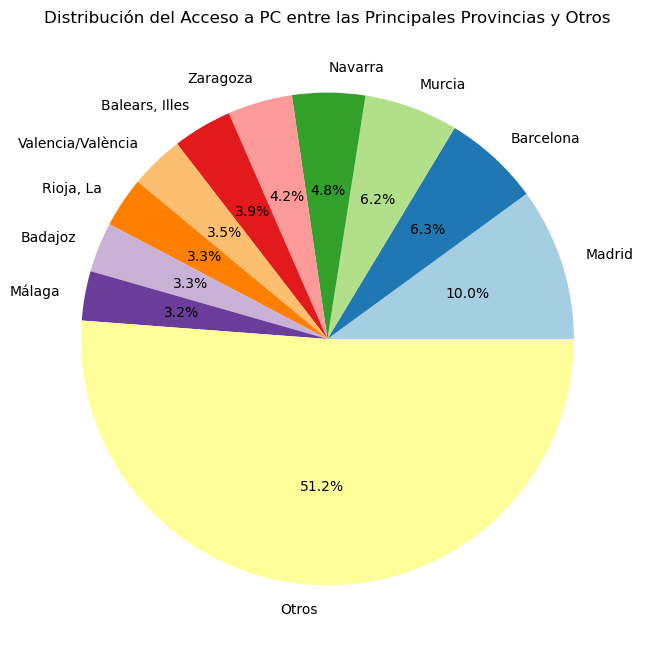

In [29]:
import matplotlib.pyplot as plt

# Agrupar los datos por Provincia y calcular la suma de acceso a PC
data_grouped_provincia = df.groupby('Provincia')['PC'].sum().reset_index()

# Ordenar los datos por el acceso a PC en orden descendente
data_grouped_provincia = data_grouped_provincia.sort_values(by='PC', ascending=False)

# Seleccionar las 10 primeras provincias con más acceso a PC
top_provincias = data_grouped_provincia[:10]

# Sumar el resto de las provincias y agruparlas bajo la categoría 'Otros'
otros = pd.DataFrame({'Provincia': ['Otros'], 'PC': [data_grouped_provincia[10:]['PC'].sum()]})

# Combinar las 10 principales provincias con la categoría 'Otros'
data_final = pd.concat([top_provincias, otros])

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el gráfico de pastel
plt.pie(data_final['PC'], labels=data_final['Provincia'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Añadir título
plt.title('Distribución del Acceso a PC entre las Principales Provincias y Otros')

# Mostrar el gráfico
plt.show()

### Explicación del Código:

1. **Importar Bibliotecas Necesarias**:
   - `matplotlib` y `seaborn` para la visualización.

2. **Agrupación de Datos por Provincia**: 
   - Comenzamos agrupando los datos por la columna `Provincia` y calculando la suma del acceso a PC (`PC`). Esto nos da el total de acceso a PC por cada provincia.

3. **Ordenar los Datos por Acceso a PC**: 
   - Ordenamos los datos en orden descendente según la columna `PC` para identificar fácilmente las provincias con el mayor acceso a PC.

4. **Seleccionar las 10 Principales Provincias**: 
   - Filtramos las 10 primeras provincias con el mayor acceso a PC. Este paso es crucial para simplificar el gráfico de pastel y evitar que sea demasiado detallado.

5. **Agrupar las Provincias Restantes en "Otros"**: 
   - Calculamos la suma de las provincias restantes (todas las que no están en el top 10) y las agrupamos en una nueva categoría llamada "Otros". Esta categoría representa el acceso a PC acumulado de todas las demás provincias menores.

6. **Combinar las Provincias Principales con la Categoría "Otros"**: 
   - Combinamos las 10 principales provincias con la nueva categoría "Otros" para preparar los datos finales que se utilizarán en el gráfico.

7. **Configurar el Tamaño del Gráfico**: 
   - Configuramos el tamaño del gráfico de pastel usando `plt.figure(figsize=(10, 8))` para que sea más grande y más fácil de leer.

8. **Crear el Gráfico de Pastel**: 
   - Utilizamos `plt.pie()` para crear el gráfico de pastel. Pasamos las cantidades (`PC`) y las etiquetas (`Provincia`) de los datos combinados. También utilizamos `autopct='%1.1f%%'` para mostrar el porcentaje de cada porción con una precisión de un decimal. Usamos una paleta de colores predefinida (`plt.cm.Paired.colors`) para dar un aspecto atractivo al gráfico.

9. **Personalización del Gráfico**:
   - Añadimos un título y etiquetas a los ejes para mejorar la claridad del gráfico.

---
---

### Tarea 3:

1. **Explorar Varias Porciones del Gráfico**: 
   - En lugar de solo explotar una porción, explora las tres porciones más grandes del gráfico para destacarlas. Ajusta la lista de explode para lograr esto.


**Preguntas para Reflexión:**
   - ¿Qué impacto tiene el reordenamiento de las porciones del gráfico en la comprensión de los datos?
   - ¿Cómo cambia la percepción de los datos al agrupar las categorías menores en "Otros"?
   - ¿Cuándo es más apropiado utilizar un gráfico de sectores en comparación con otros tipos de gráficos?
---
---

### Solución Tarea 3:

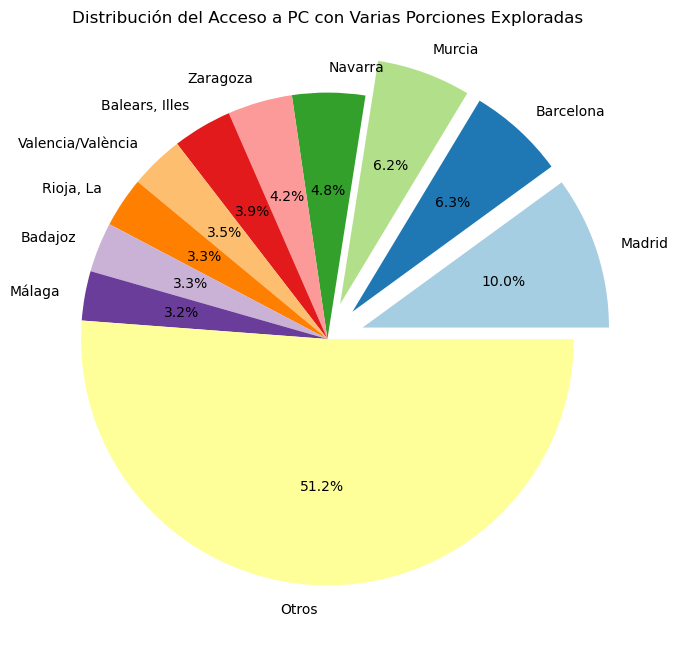

In [33]:
import matplotlib.pyplot as plt

# Agrupar los datos por Provincia y calcular la suma de acceso a PC
data_grouped_provincia = df.groupby('Provincia')['PC'].sum().reset_index()

# Ordenar los datos por el acceso a PC en orden descendente
data_grouped_provincia = data_grouped_provincia.sort_values(by='PC', ascending=False)

# Seleccionar las 10 primeras provincias con más acceso a PC
top_provincias = data_grouped_provincia[:10]

# Sumar el resto de las provincias y agruparlas bajo la categoría 'Otros'
otros = pd.DataFrame({'Provincia': ['Otros'], 'PC': [data_grouped_provincia[10:]['PC'].sum()]})

# Combinar las 10 principales provincias con la categoría 'Otros'
data_final = pd.concat([top_provincias, otros])

# 1. Explorar Varias Porciones del Gráfico
explode = (0.15, 0.15, 0.15, 0, 0, 0, 0, 0, 0, 0, 0)  # Explota las tres porciones más grandes

plt.figure(figsize=(10, 8))
# Añadir explosión (explode)
plt.pie(data_final['PC'], labels=data_final['Provincia'], autopct='%1.1f%%', colors=plt.cm.Paired.colors, 
        explode=explode)  
plt.title('Distribución del Acceso a PC con Varias Porciones Exploradas')
plt.show()

 ### 1.4 Histograma para la distribución de edades

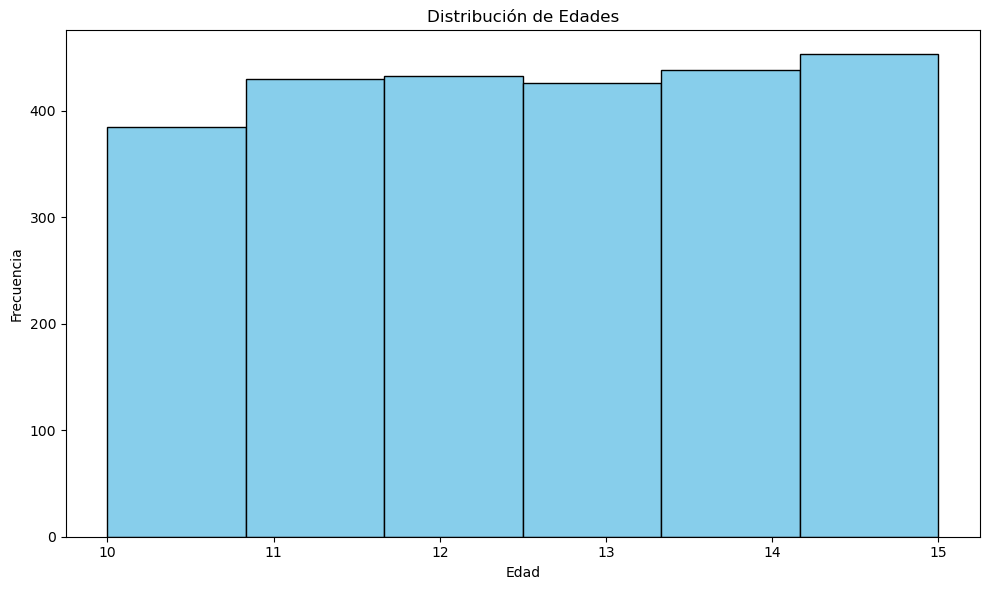

In [35]:
# Crear un histograma para la distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(df['EDAD'], bins=6, color='skyblue', edgecolor='black') 

# Añadir título y etiquetas
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

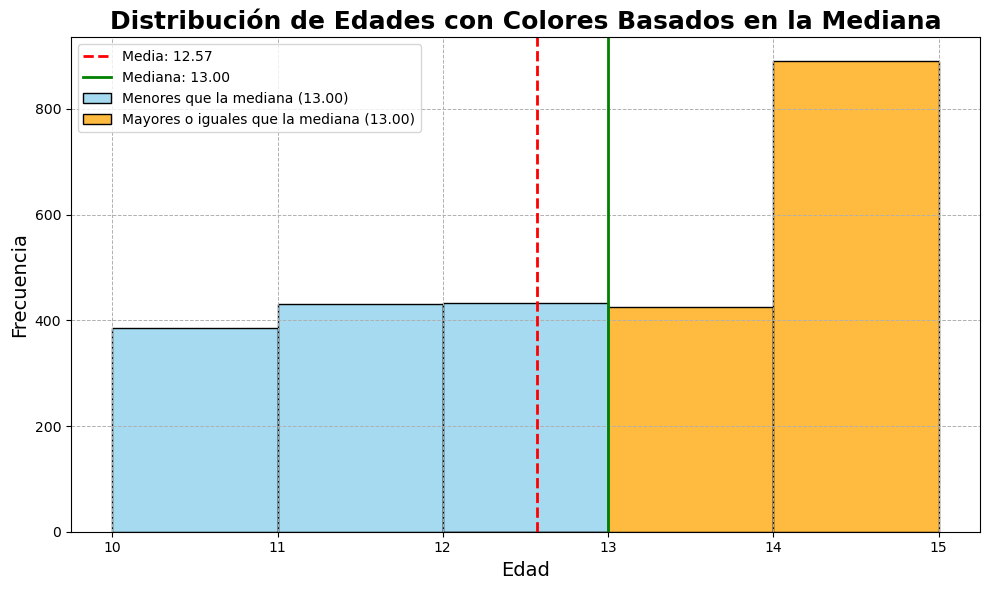

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la mediana de las edades
median_age = df['EDAD'].median()

# Crear un histograma con un intervalo entre 12 y 13
plt.figure(figsize=(10, 6))

# Histograma para edades menores que la mediana
sns.histplot(df[df['EDAD'] < median_age]['EDAD'], bins=[10, 11, 12, 13], kde=False, color='skyblue', edgecolor='black', label=f'Menores que la mediana ({median_age:.2f})')

# Histograma para edades mayores o iguales que la mediana
sns.histplot(df[df['EDAD'] >= median_age]['EDAD'], bins=[12, 13, 14, 15], kde=False, color='orange', edgecolor='black', label=f'Mayores o iguales que la mediana ({median_age:.2f})')

# Añadir una línea que represente la media y la mediana
plt.axvline(df['EDAD'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Media: {df["EDAD"].mean():.2f}')
plt.axvline(median_age, color='green', linestyle='solid', linewidth=2, label=f'Mediana: {median_age:.2f}')

# Añadir cuadrícula para mejorar la legibilidad
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

# Añadir título y etiquetas
plt.title('Distribución de Edades con Colores Basados en la Mediana', fontsize=18, fontweight='bold')
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### 1.5. Gráfico de dispersión (scatter plot) para la relación entre edad y uso de móvil

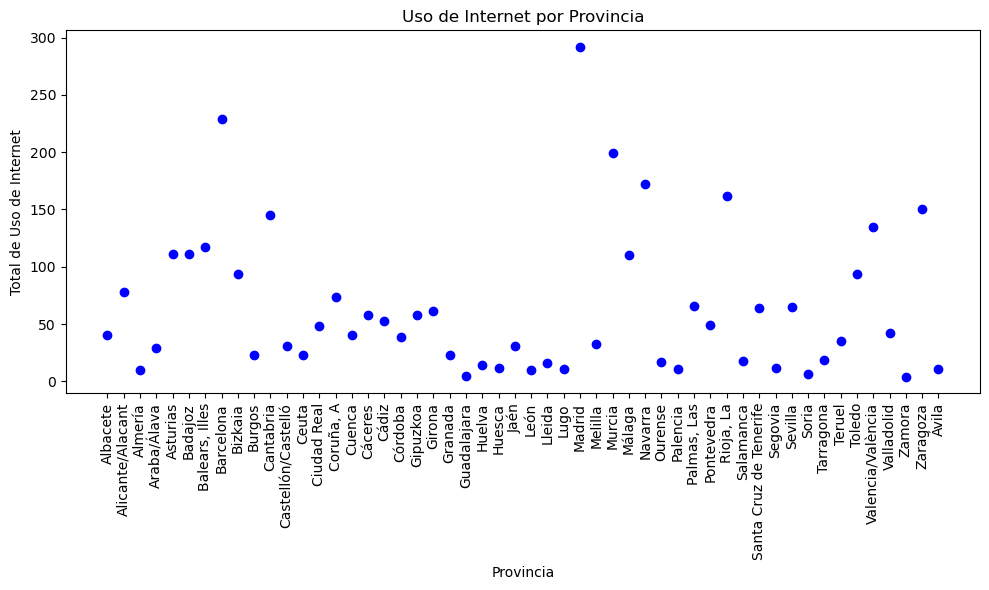

In [38]:
# Agrupar por provincia y calcular el total de uso de internet
df_grouped = df.groupby('Provincia')['INT'].sum().reset_index()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_grouped['Provincia'], df_grouped['INT'], color='blue')

# Añadir título y etiquetas
plt.title('Uso de Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Total de Uso de Internet')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas de la provincia si hay muchas
plt.tight_layout()
plt.show()


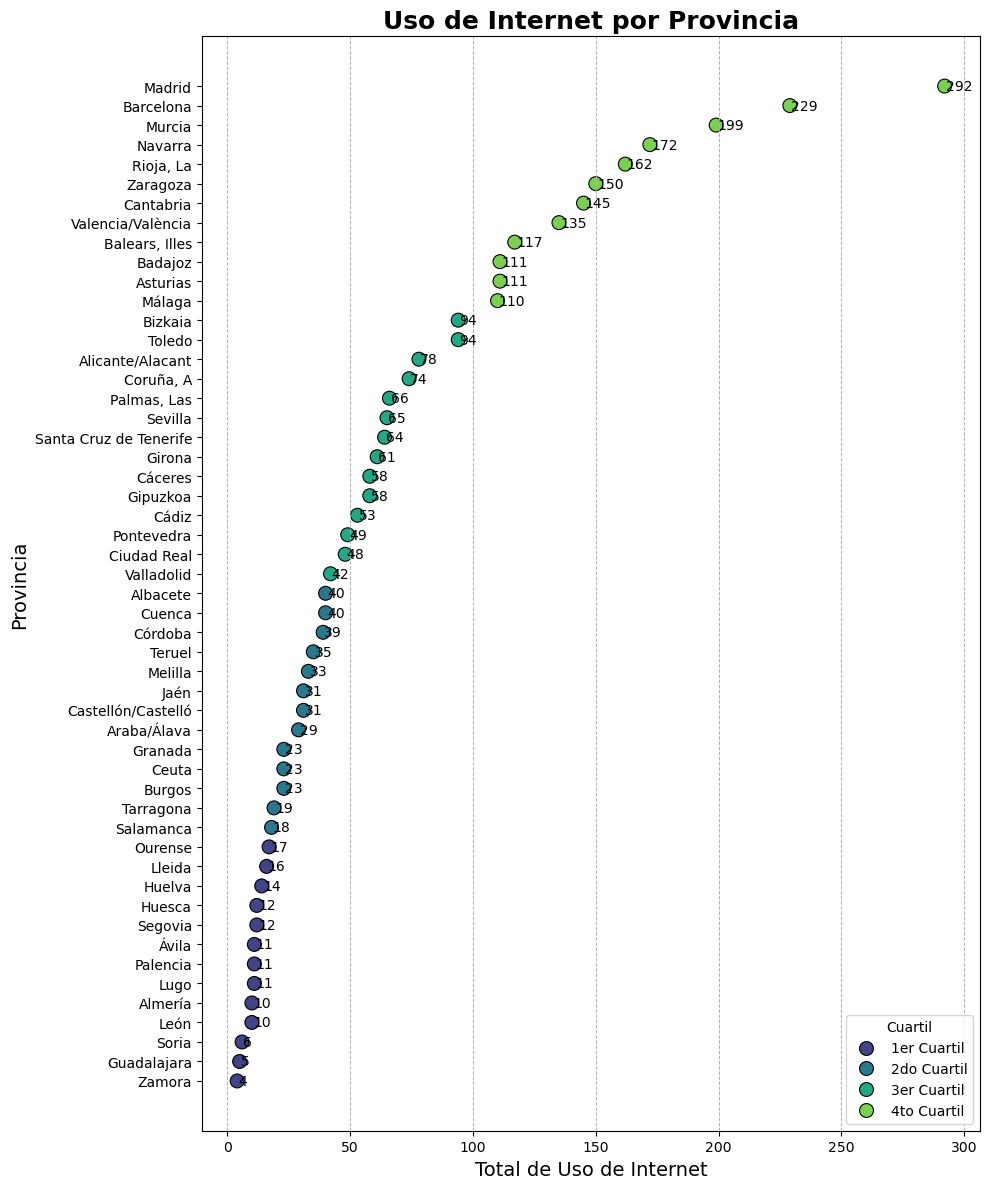

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar por provincia y calcular el total de uso de internet
df_grouped = df.groupby('Provincia')['INT'].sum().reset_index()

# Ordenar las provincias para mejorar la presentación en el gráfico
df_grouped = df_grouped.sort_values(by='INT', ascending=False)

# Calcular los cuartiles para asignar colores
df_grouped['Cuartil'] = pd.qcut(df_grouped['INT'], 4, labels=['1er Cuartil', '2do Cuartil', '3er Cuartil', '4to Cuartil'])

# Crear el gráfico de dispersión con Provincias en el eje Y y Total de Uso de Internet en el eje X
plt.figure(figsize=(10, 12))
sns.scatterplot(x='INT', y='Provincia', hue='Cuartil', data=df_grouped, s=100, palette='viridis', edgecolor='black')

# Añadir título y etiquetas
plt.title('Uso de Internet por Provincia', fontsize=18, fontweight='bold')
plt.xlabel('Total de Uso de Internet', fontsize=14)
plt.ylabel('Provincia', fontsize=14)

# Añadir etiquetas en cada punto para mostrar el valor exacto
for i in range(len(df_grouped)):
    plt.text(df_grouped['INT'].values[i] + 0.5, i, f'{df_grouped["INT"].values[i]:.0f}', 
             va='center', fontsize=10, color='black')

# Añadir cuadrícula para mejorar la legibilidad
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)

# Añadir leyenda para los cuartiles
plt.legend(title='Cuartil', loc='lower right', fontsize=10)

# Ajustar los márgenes para que las etiquetas no se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### 1.6. Diagrama de cajas y bigotes para la distribución de edades por comunidad

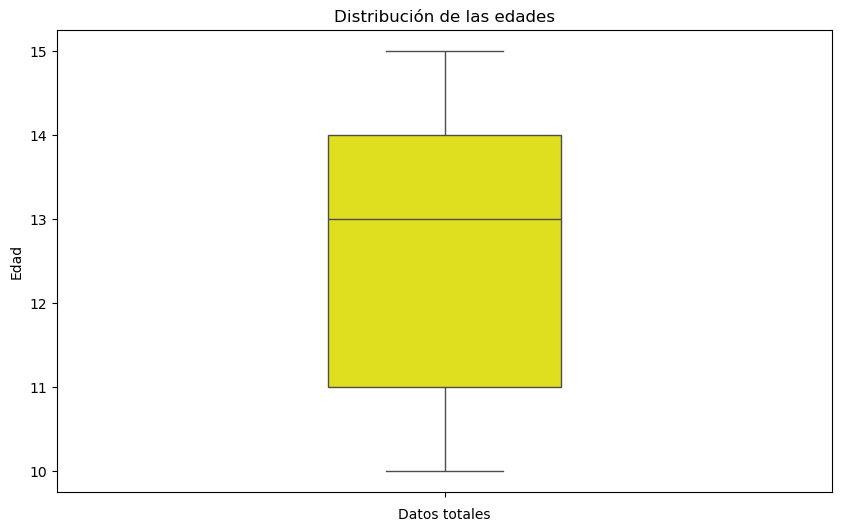

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Crear un diagrama de cajas y bigotes
sns.boxplot(data=df, y='EDAD', color='yellow', width=0.3)
plt.title('Distribución de las edades')
plt.xlabel('Datos totales')
plt.ylabel('Edad')
plt.show()

Vamos a describir el código anterior paso a paso:


- `plt.figure(figsize=(10, 6))`: Crea una nueva figura con un tamaño de 10x6 pulgadas. Esto define el tamaño del gráfico.
- `sns.boxplot(data=df, y='EDAD', color='yellow', width=0.3)`: Genera el diagrama de caja usando los datos de la variable "EDAD2.
  - `data=df` especifica el DataFrame a utilizar, en este caso creado previamente en el apartado 1.
  - `y='EDAD'` selecciona la variable del Dataframe que se va a utilizar, en este caso la variable "EDAD". 
  - `color='yellow'` da un color amarillo a la caja.
  - `width=0.3` define la anchura de la caja.
  

- `plt.title('Distribución de las edades')`: Añade un título al gráfico.
- `plt.xlabel('Datos totales')`: Etiqueta el eje X con "Datos totales".
- `plt.ylabel('Edad')`: Etiqueta el eje Y con "Edad".
- `plt.xticks(rotation=90)`: Gira los nombres de las comunidades en el eje X para que sean legibles.


- `plt.show()`: Muestra el gráfico en pantalla.ra el gráfico en pantalla

Otro ejemplo puede ser clasificando las edades por comunidad:

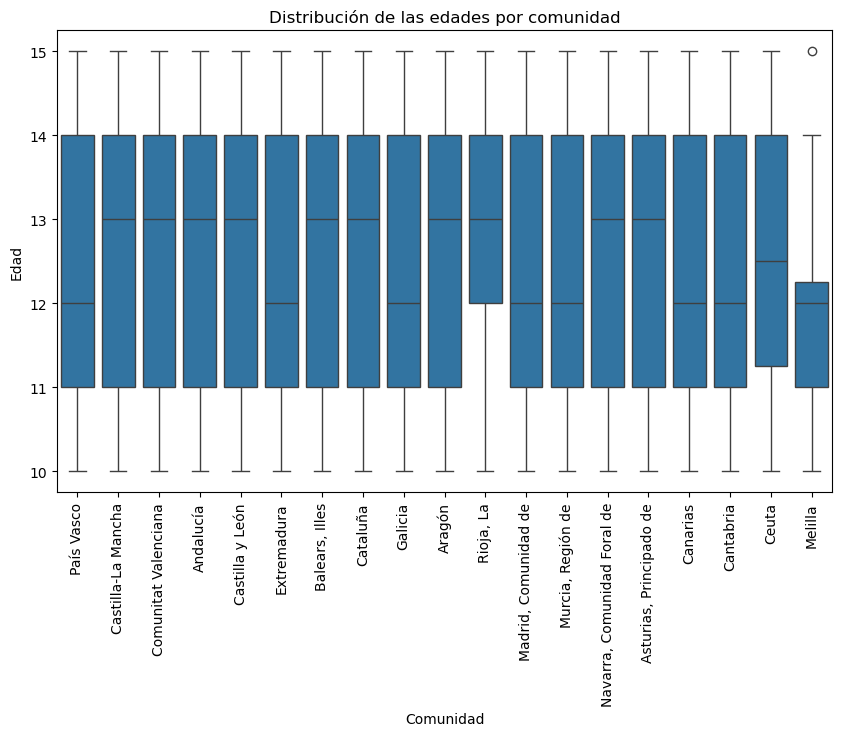

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Comunidad', y='EDAD')
plt.title('Distribución de las edades por comunidad')
plt.xlabel('Comunidad')
plt.ylabel('Edad')
plt.xticks(rotation=90)
plt.show()

En este al código anterior a `sns.boxplot()` se ha añadido `x='Comunidad'` lo cual presenta los distintos diagramas de cajas sobre la distribución de edades por comunidad en el mismo DataFrame.

Se utiliza `plt.xticks(rotation=90)` como anteriormente ya que gira los nombres de las comunidades en el eje X para que sean legibles

/var/folders/mj/myj7wvxs4rz6c4231bx7d9hw0000gn/T/ipykernel_10956/1601638323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EDAD', y='Comunidad', palette='Set2')


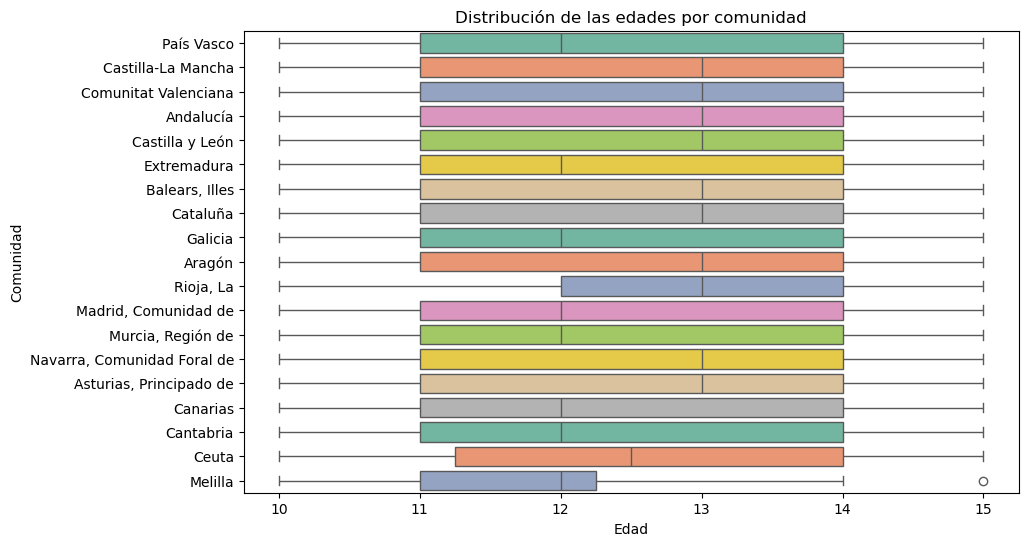

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='EDAD', y='Comunidad', palette='Set2')
plt.title('Distribución de las edades por comunidad')
plt.xlabel('Edad')
plt.ylabel('Comunidad')
plt.show()

Permutando la variable `x` e `y` se cambia la orientación del gráfico.

- `palette='Set2'`: Utiliza otra paleta de colores para el relleno de las cajas del gráfico.

---
---

### Tarea 6:

1. 


**Preguntas para Reflexión:**
   - ¿Cuándo es más apropiado utilizar un diagrama de cajas y bigotes en comparación con otros tipos de gráficos?
---
---

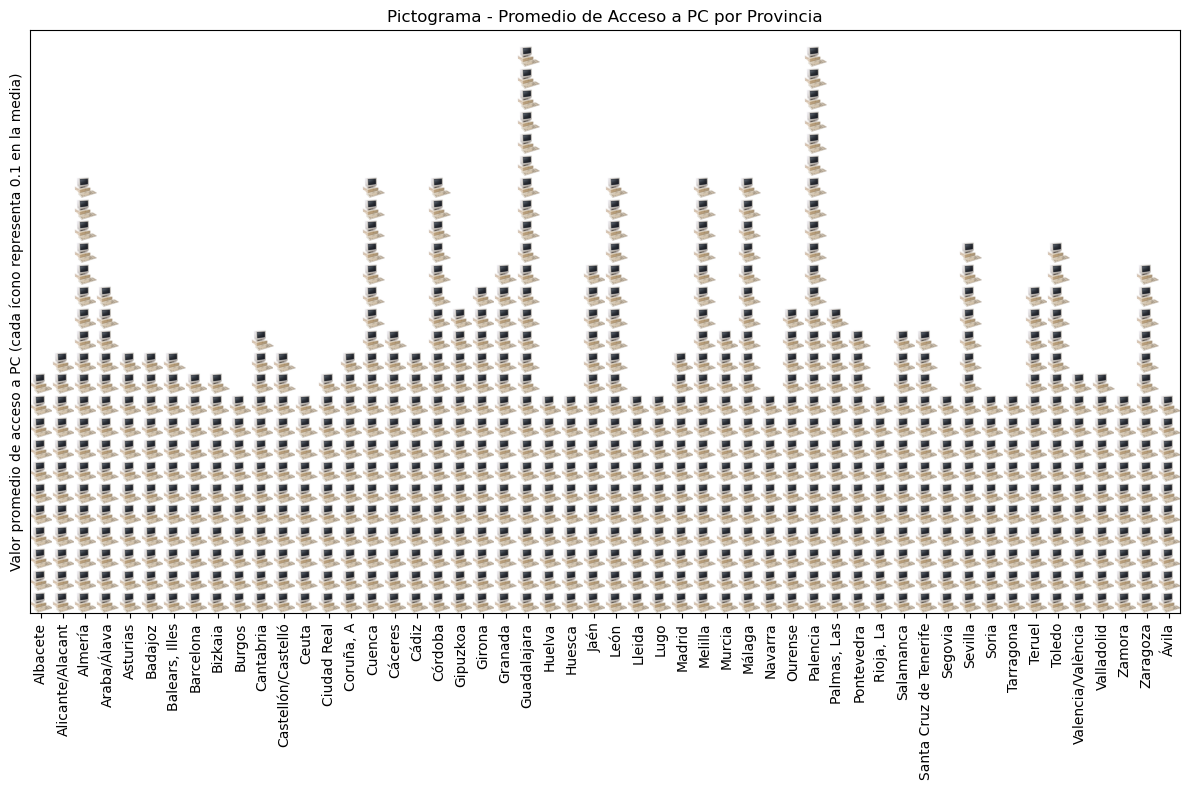

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Agrupar por provincia y calcular la media de acceso a computadoras (PC == 1)
df_grouped = df.groupby('Provincia')['PC'].mean().reset_index()

# Cargar la imagen de ícono de persona
person_icon = mpimg.imread('ordenador.png')

# Definir la figura
fig, ax = plt.subplots(figsize=(12, 8))

# Número de personas representadas por cada ícono (ajusta este valor según lo necesites)
people_per_icon = 0.1  # Por ejemplo, cada ícono representa 0.1 en la media

# Calcular el tamaño de cada ícono
icon_height = 1  # Ajustar la altura del ícono en unidades de "barra"
icon_width = 1   # Ajustar el ancho del ícono en unidades de "barra"

# Dibujar íconos para cada provincia en columnas, simulando un diagrama de barras
for idx, row in enumerate(df_grouped.itertuples()):
    num_people = int(row.PC / people_per_icon)  # Número de íconos en la "barra" (media de PC)
    
    # Centrar los íconos en la columna
    for i in range(num_people):
        y_position = i * icon_height
        ax.imshow(person_icon, extent=[idx - icon_width/2, idx + icon_width/2, y_position, y_position + icon_height], aspect='auto')

# Configuración del gráfico
ax.set_xlim(-0.5, len(df_grouped) - 0.5)
ax.set_ylim(0, max(df_grouped['PC']) / people_per_icon)
ax.set_xticks(range(len(df_grouped)))
ax.set_xticklabels(df_grouped['Provincia'], rotation=90)
ax.set_yticks([])
ax.set_ylabel(f'Valor promedio de acceso a PC (cada ícono representa {people_per_icon} en la media)')

plt.title(f'Pictograma - Promedio de Acceso a PC por Provincia')
plt.tight_layout()
plt.show()
